ObsとMSMの差を確認するノート
## したい事
- 雲量の違い
- その可視化

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['savefig.facecolor'] = 'white'
sns.set(font="Yu Gothic")

%matplotlib inline
import japanize_matplotlib
import datetime as dt
import time
import sys
sys.path.append("../")
import os

import modules
import modules.self_made_modules as mymodule

In [78]:
class Plotter:
    def __init__(self,date) -> None:
        pocj = mymodule.PlotCloudOnJapan(date)
        self.date = date
        self.msm_df = pocj.coordinate(lat=35.41,lon=139.45)
        self.obs_df = pd.read_csv(f"../obsData_utc/44_47662/{self.date.year}/{self.date.month}/44_47662_{self.date.year}_{self.date.month}_{self.date.day}.csv")
        self.obs_df["日付"] = pd.to_datetime(self.obs_df["日付"])
        self.obs_df["雲量"] = self.obs_df["雲量"]*10 # 10倍して0-100の範囲にする
        values = self.obs_df["雲量"].copy()

        smoothed_values = []
        for i in range(len(values)):
            if values[i] == 0:
                if i == 0:
                    smoothed_value = (values[i+1]) / 2
                elif i == len(values) - 1:
                    smoothed_value = (values[i-1]) / 2
                else:
                    smoothed_value = (values[i-1] + values[i+1]) / 2
                smoothed_values.append(smoothed_value)
            else:
                smoothed_values.append(values[i])

        print(smoothed_values)
        self.obs_df["雲量"] = smoothed_values
    def padding_obs(obs_df):
        pass

    def plott(self,isplot=False):
        fig,ax = plt.subplots()

        ax.plot(self.msm_df.index,self.msm_df["ncld"],label="MSM")
        ax.set_xlabel("Date")
        ax.tick_params(axis="x",rotation=45)
        ax.set_ylim(0,110)

        ax.plot(self.obs_df["日付"],self.obs_df["雲量"],label="OBS",color="red")
        ax.set_ylabel("雲量")

        ax.legend(loc="best")
        plt.title(f"東京(35,139)|{self.date.year}-{self.date.month}-{self.date.day}")
        # plt.subplots_adjust(top=1.2)

        if isplot:
            plt.show()
        else:
            os.makedirs(f"../png/diff/{self.date.month}",exist_ok=True)
            plt.savefig(f"../png/diff/{self.date.month}/東京_{self.date.year}_{self.date.month}_{self.date.day}.png",bbox_inches='tight')
            plt.close()

In [79]:
date = dt.date(2022,6,1)

2022-06-01
[95.0, 47.5, 50.0, 100.0, 50.0, 47.5, 95.0, 47.5, 47.5, 95.0, 47.5, 47.5, 95.0, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 70.0, 35.0, 0.0]


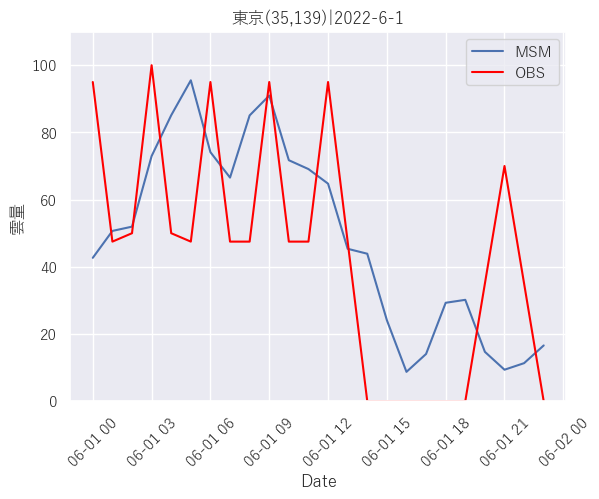

In [80]:
print(date)
p = Plotter(date)
p.plott(isplot=True)
date += dt.timedelta(days=1)

In [50]:
df = p.obs_df["雲量"]
for i in range(0,24):
    if i >= 22:
        continue
    if i%3 == 0:
        continue
    elif i%2 == 0: # 3の倍数じゃなくて偶数
        df[i] = (df[i-2] + df[i+1])/2
    else: # 3の倍数じゃなくて奇数
        df[i] = (df[i-1] + df[i+1])/2
df

C:\Users\astro\AppData\Local\Temp\ipykernel_18660\3914971385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = (df[i-1] + df[i+1])/2
C:\Users\astro\AppData\Local\Temp\ipykernel_18660\3914971385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = (df[i-2] + df[i+1])/2


0      95.00000
1      96.25000
2      97.50000
3     100.00000
4      60.93750
5      77.96875
6      95.00000
7      95.00000
8      95.00000
9      95.00000
10     59.37500
11     77.18750
12     95.00000
13     71.25000
14     47.50000
15      0.00000
16     29.68750
17     14.84375
18      0.00000
19     17.50000
20     35.00000
21     70.00000
22      0.00000
23      0.00000
Name: 雲量, dtype: float64

In [6]:
date = dt.date(2022,1,1)
while True:
    print("\r"+str(date),end="")
    plott(date)
    date += dt.timedelta(days=1)
    time.sleep(2)
    if date.year > 2022:
        break
    # if date.month > 1:
    #     break

2022-12-31

FileNotFoundError: [Errno 2] No such file or directory: '../obsData_utc/44_47662/2022/12/44_47662_2022_12_31.csv'